## Task Description

In this exercise, you will develop a Convolutional Neural Network (CNN) model to identify species of flowers from photographs. The model will be trained using the [tf_flowers dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers) from TensorFlow. The dataset comprises 3670 color photographs of flowers, representing five different species:

- Daisy
- Dandelion
- Roses
- Sunflowers
- Tulips

To obtain this dataset, you can download it directly from the following URL: [Download Flower Photos](http://download.tensorflow.org/example_images/flower_photos.tgz).

Once you have unzipped the `.tgz` file, you will observe that the images are organized into five subdirectories, each corresponding to one of the five class labels.


### 1. Importing Required Libraries

In [28]:
# importing libraries 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import warnings 

warnings.filterwarnings('ignore')

### 2. Image Preprocessing 

#### 2.1. Loading photo directory 

In [29]:
data_dir = r'E:\Project\Machine Learing\paid\flowers' # include here your data dir instead of mine

categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] # we have 5 categories of flowers
data_dir # checking whether my dir works properly or or not

'E:\\Project\\Machine Learing\\paid\\flowers'

#### 2.2. Declare an empty data dictionary

       In data dictionary we will store image and correspoding label(category) from five different subdirectories.

In [30]:
# making a dictionary name data to keep my images with label
data = []

In [31]:
# I use this function to test my whether image path is valid or not. Thats the reason I plot the image by calling it from make_data() 
def show_img(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('image1')
    plt.show()
    

#### 2.3. Make data dictionary

*make_data()*: using this method, I make my data dictionary as i previously declared above.


In [32]:
def make_data():
    for category in categories:
        path = os.path.join(data_dir, category) # .../flowers/daisy
        label = categories.index(category)

        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)
            # to test your image just call show_img() and pass the image i.e. show_img(image)
            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                image = np.array(image, dtype = np.float32) # converting image into numpy array
                
                data.append([image, label])
                
            except Exception as e:
                pass
        print(len(data))
                
    
make_data()


633
1531
2172
2871
3670


In [33]:
# check total number of photos 
len(data)

3670

In [34]:
np.random.shuffle(data) # shuffle your data

#### 2.4. Feature scaling
        Take the image value betwee 0 to 1 by dividing 255

In [35]:
features = []
labels = []

for img, label in data:
    features.append(img)
    labels.append(label)


# conver fetures and labels into numpy array
features = np.array(features, dtype=np.float32)
labels = np.array(labels, dtype=np.float32)


In [36]:
# feature scaling 

features = features / 255.0


#### 2.5. Training and Testing Data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1)


#### 2.6. Data Augmentation 

In [38]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [39]:
# Learning Rate Schedule
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


In [40]:
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### 3. Build the CNN Model

#### 3.1. Feature Learning and create model

In [41]:
input_layer = tf.keras.layers.Input([224, 224, 3])
conv1 = tf.keras.layers.Conv2D(filters = 32, 
                                      kernel_size = (5, 5), 
                                      padding = 'same', 
                                      activation = 'relu')(input_layer)

pool1 =tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters = 64, 
                                      kernel_size = (3, 3), 
                                      padding = 'same', 
                                      activation = 'relu')(pool1)


pool2 =tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters = 96, 
                                      kernel_size = (3, 3), 
                                      padding = 'same', 
                                      activation = 'relu')(pool2)

pool3 =tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters = 96, 
                                      kernel_size = (3, 3), 
                                      padding = 'same', 
                                      activation = 'relu')(pool3)

pool4 =tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(conv4)

fltn = tf.keras.layers.Flatten()(pool4)

# dn1 = tf.keras.layers.Dense(512, activation = 'relu')(fltn)
dn2 = tf.keras.layers.Dense(128, activation = 'relu')(fltn)
out = tf.keras.layers.Dense(5, activation = 'softmax')(dn2)

model  = tf.keras.Model(input_layer, out)

#### 3.2. compile the model

In [42]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 3.3. Fit the model using training data

In [43]:
# Fit the model using training data

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_test, Y_test),
                    callbacks=[reduce_lr, early_stop])

Epoch 1/30
104/104 [==============================] - 125s 998ms/step - loss: 1.4018 - accuracy: 0.3836 - val_loss: 1.1639 - val_accuracy: 0.4986 - lr: 1.0000e-04
Epoch 2/30
104/104 [==============================] - 92s 877ms/step - loss: 1.1670 - accuracy: 0.5002 - val_loss: 1.0659 - val_accuracy: 0.5422 - lr: 1.0000e-04
Epoch 3/30
104/104 [==============================] - 92s 886ms/step - loss: 1.0769 - accuracy: 0.5658 - val_loss: 1.0317 - val_accuracy: 0.5640 - lr: 1.0000e-04
Epoch 4/30
104/104 [==============================] - 97s 934ms/step - loss: 1.0163 - accuracy: 0.5964 - val_loss: 0.9528 - val_accuracy: 0.6104 - lr: 1.0000e-04
Epoch 5/30
104/104 [==============================] - 91s 873ms/step - loss: 0.9777 - accuracy: 0.6343 - val_loss: 0.9339 - val_accuracy: 0.6485 - lr: 1.0000e-04
Epoch 6/30
104/104 [==============================] - 90s 865ms/step - loss: 0.9331 - accuracy: 0.6452 - val_loss: 0.8914 - val_accuracy: 0.6458 - lr: 1.0000e-04
Epoch 7/30
104/104 [=======

#### 3.4. Save the model for reuse(without training again)

In [51]:
# saving my model for future uses
model.save('mymodel.h5')

In [52]:
# loading my model

model = tf.keras.models.load_model('mymodel.h5')

#### 3.5. Evaluating the model performance

In [53]:
# evaluting the model 
model.evaluate(X_test, Y_test, verbose=1)

12/12 [==============================] - 3s 231ms/step - loss: 0.6673 - accuracy: 0.7275


[0.6672996282577515, 0.7275204062461853]

Model accuracy: 72%

#### 3.6. Make prediction using Testing data

In [58]:
# make prefdiciton on Testing data 

prediction = model.predict(X_test)

12/12 [==============================] - 3s 234ms/step


### 4. Comparison between Actual data and Predicted data, overfitting

#### 4.1. Actual data vs predicted data(i take only first 10 data i.e. photos)

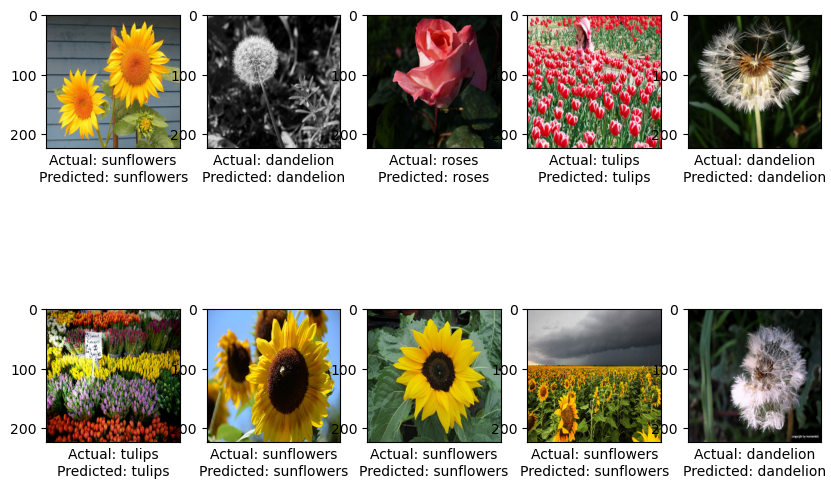

In [59]:
plt.figure(figsize=(10, 7))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    
    actual_label = categories[int(Y_test[i])]  # Convert float32 to int
    predicted_label = categories[np.argmax(prediction[i])]
    
    plt.xlabel('Actual: ' + actual_label + '\nPredicted: ' + predicted_label)
    plt.xticks([])

plt.show()


#### 4.2. Evidence of overfitting present or not in my model

        Overfitting: Using training and validation accuracy and loss curves we can check overfitted model. 
        If the training accuracy is significantly higher(>10%) than validation accuracy, or if the 
        validation loss increases while training loss decreases, it may indicate overfitting.

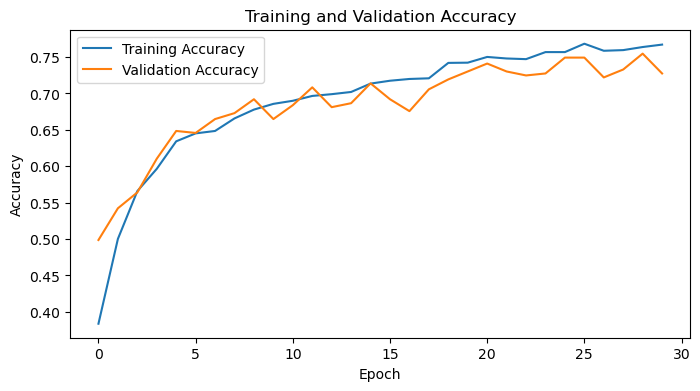

In [60]:
# Plot training history
plt.figure(figsize=(8, 4))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



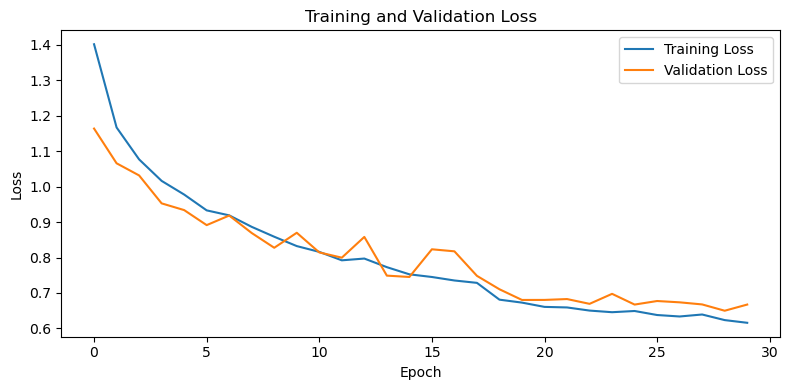

In [61]:
# Plot Loss
plt.figure(figsize=(8, 4))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()